In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys
from _shear_frame import ShearFrame_3D
from utils_OB import *


Creating a time series and defining mass and stiffness for a four story shear frame:

In [2]:
t=np.linspace(0,100,10000)

kx=np.array([2,2,7,2])*1000   # stiffness of each floor in x-direction
ky=kx*3                       # stiffness of each floor in y-direction
m=np.array([5,5,5,5])   # mass of each floor

Creating the frame object, and assigning the mass and stiffness arrays to it: 

In [3]:
frame=ShearFrame_3D()
frame.set_mass_and_stiffness(kx,ky,m)
frame.set_damping() #Rayleig damping with 5% damping in the two lowest modes in each direction by default.  

Crating a load series and duplicate it to apply in all dofs: 


In [4]:
load=load_series(t)     #initilize a empty load series
load.add_white_noise(100) # add white noise with a relative amplitude of 1 to the series
F=np.array([load.F]*8)  #copy the load to apply in all dofs

Simulate response: 

In [5]:
ddu,du,u=frame.simulate_response(t,F)

Visulize the system: 

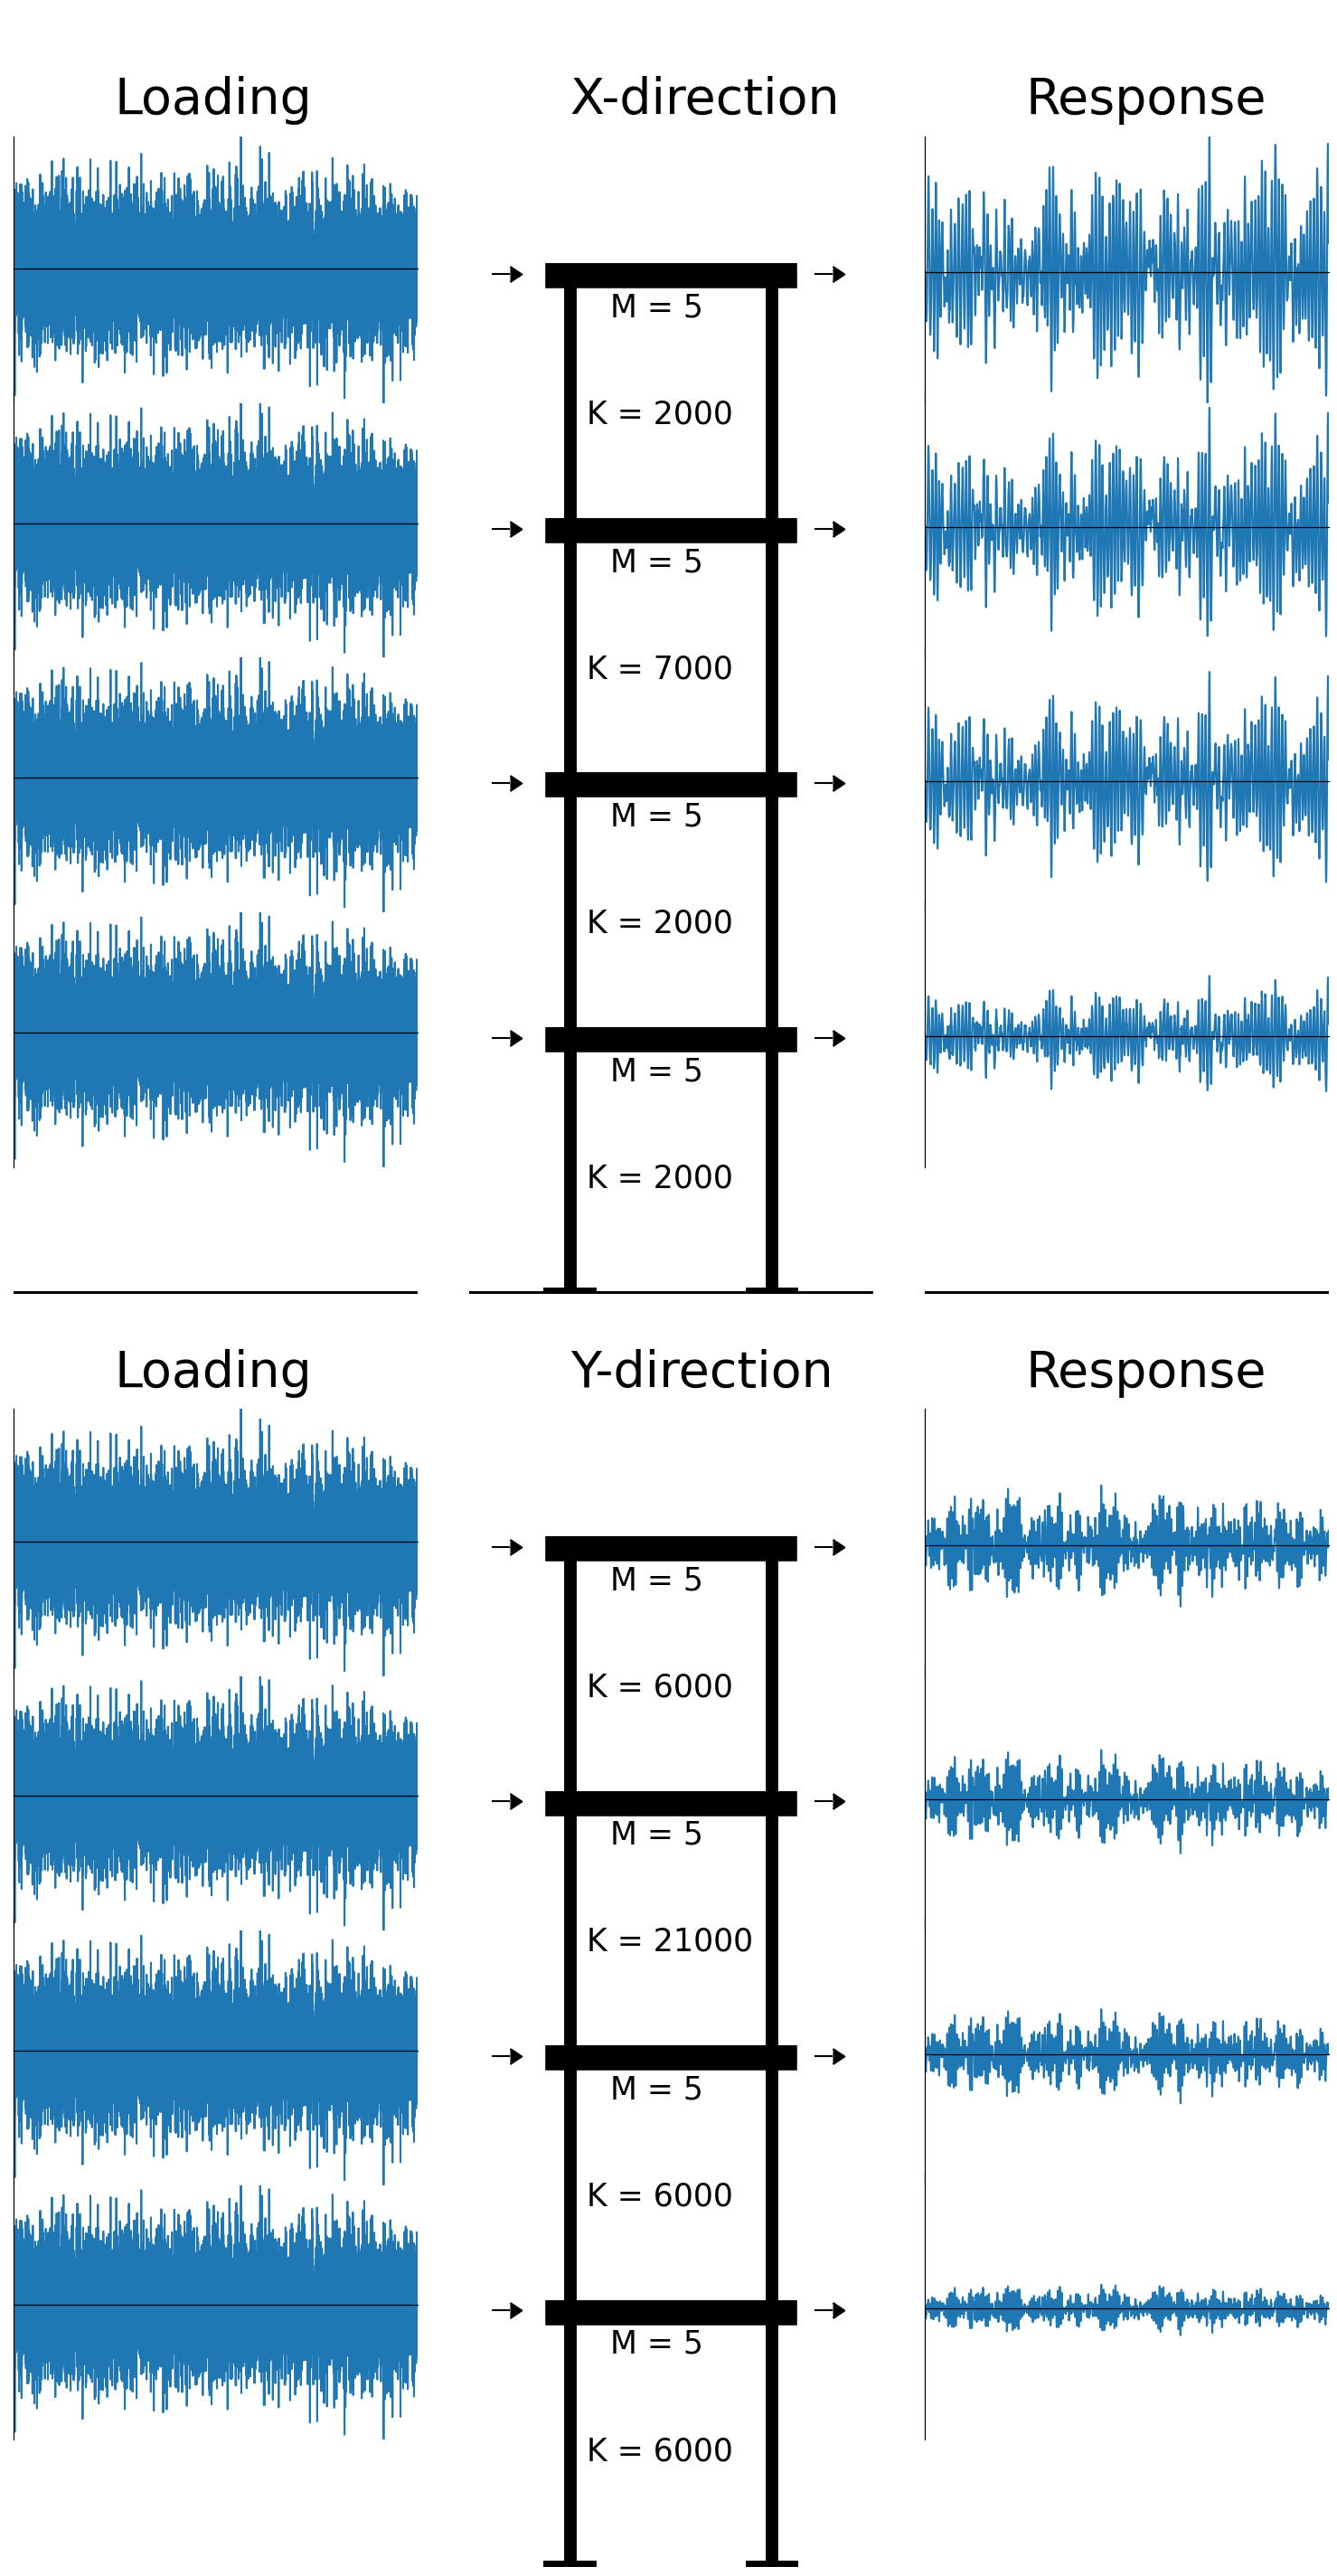

In [6]:
plt.show(frame.display_system(F,u,t))